In [1]:
from detr_config import Config
from detr_factory import DETRFactory
from detr_file_manager import FileManager
from detr_metrics import MetricsAggregator, metrics_names
import matplotlib.pyplot as plt
import numpy as np


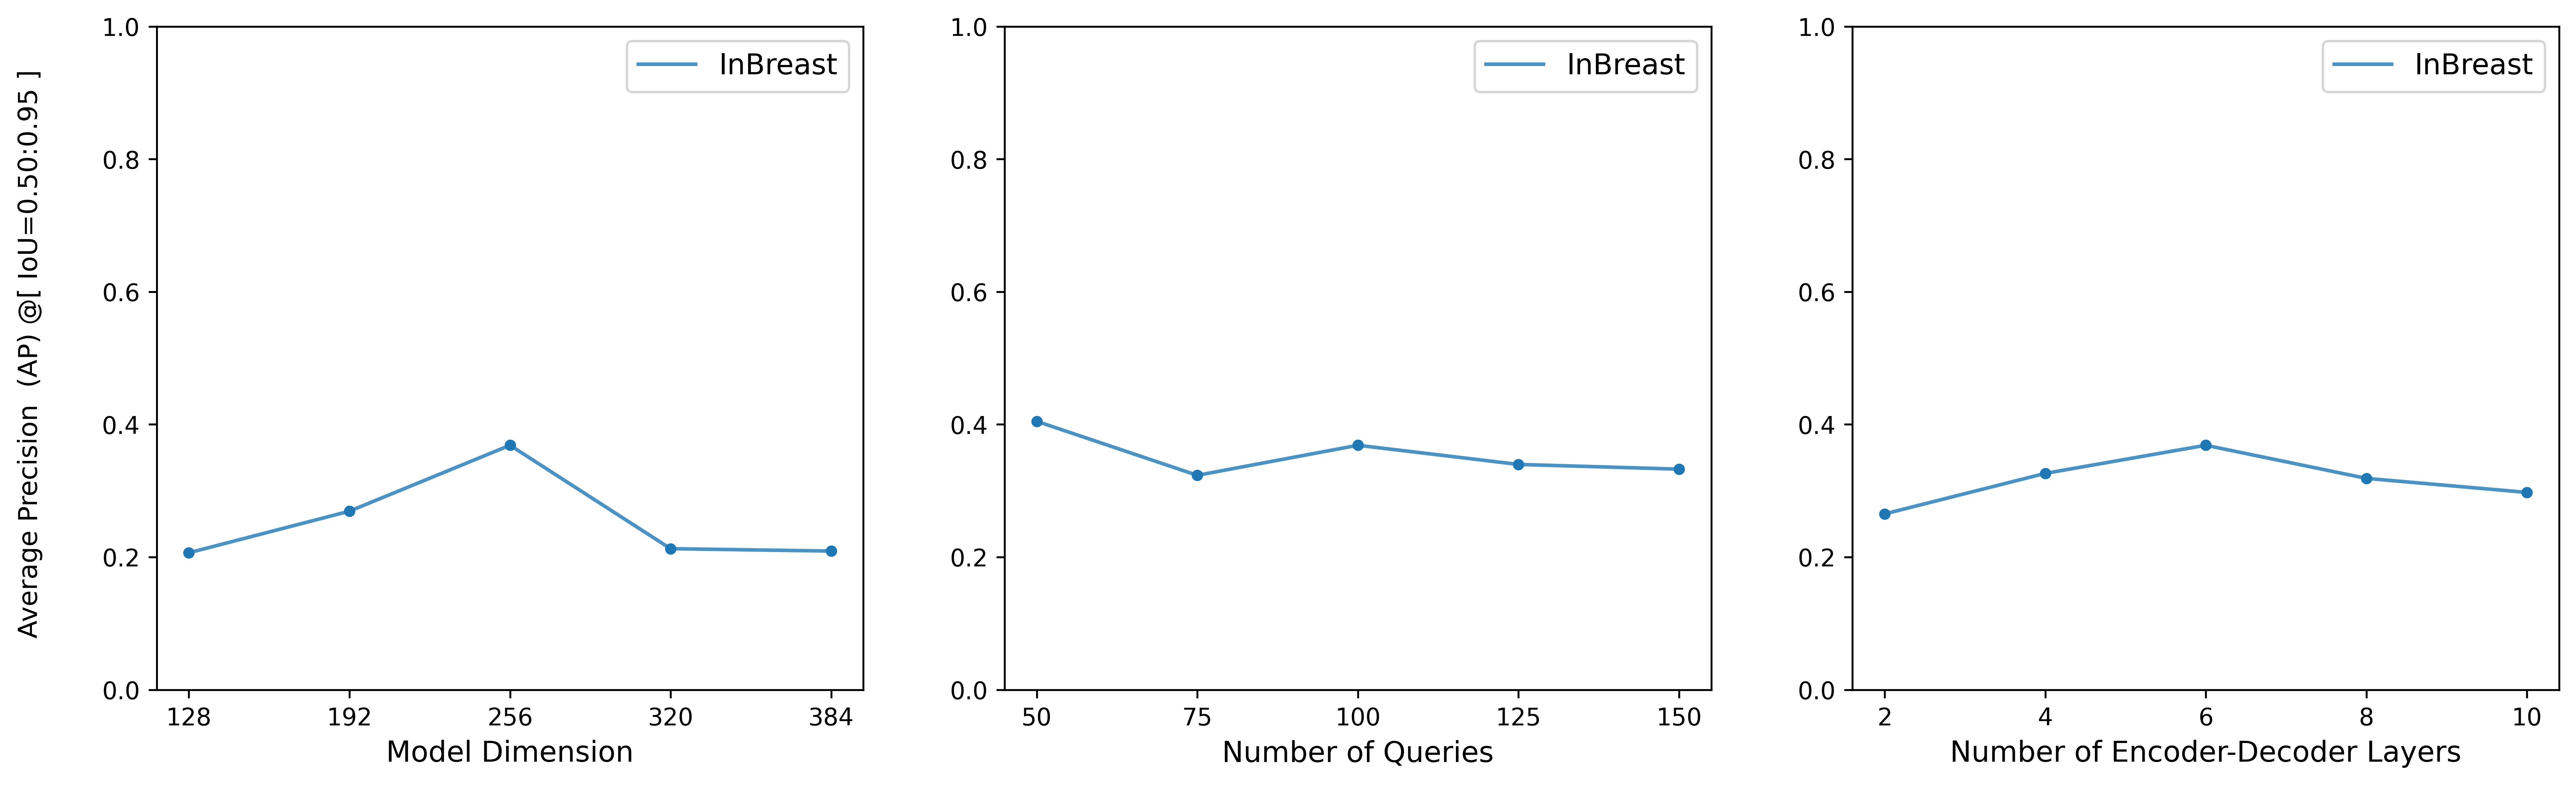

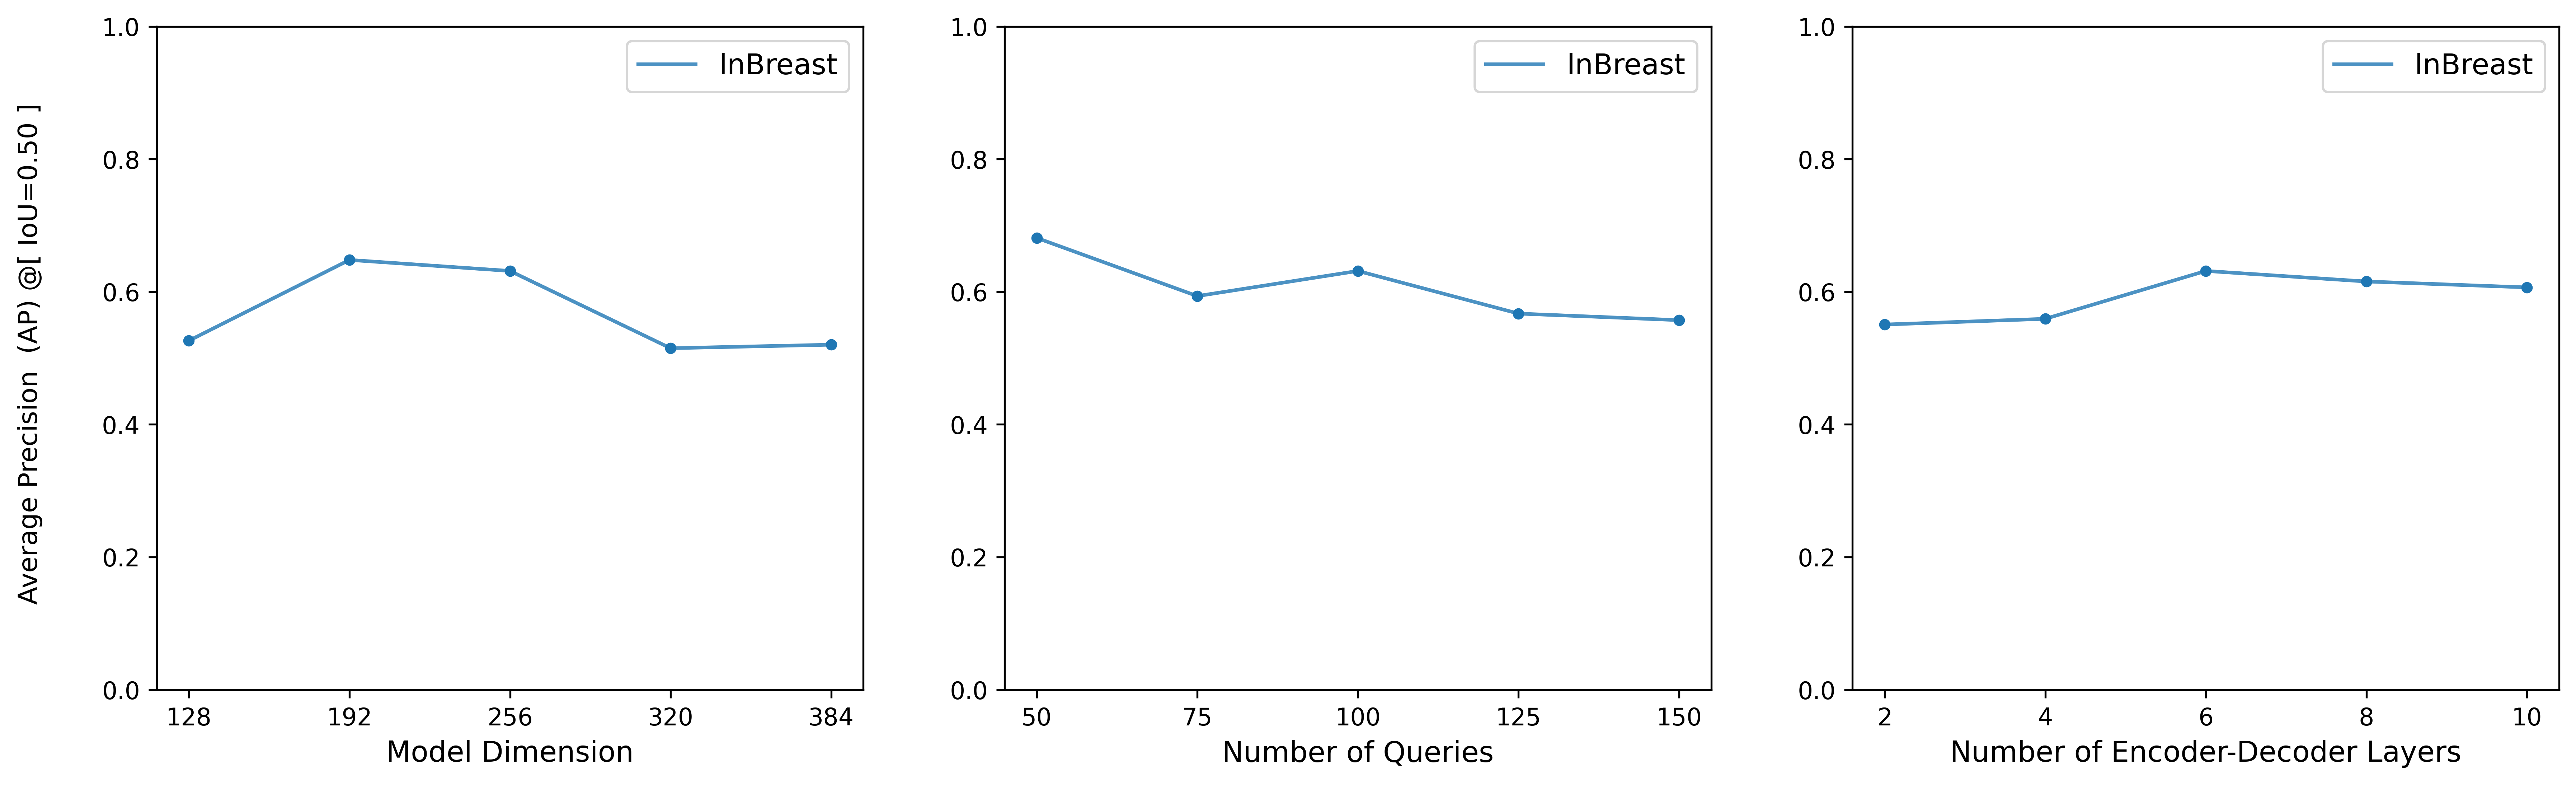

In [6]:
Config.set_benchmark_settings()
Config.LOGS_DIR = '../Otros/lightning_logs_final/'
# Config.LOGS_DIR = '../Otros/lightning_logs_test_plots'

datasets = [
    'InBreast-COCO',
    # 'DDSM-COCO'
]

hyperparam_lists = {
    'Model Dimension':
    [
        ('D-DETR', 'resnet50', 128, 100, 6),
        ('D-DETR', 'resnet50', 192, 100, 6),
        ('D-DETR', 'resnet50', 256, 100, 6),
        ('D-DETR', 'resnet50', 320, 100, 6),
        ('D-DETR', 'resnet50', 384, 100, 6),
    ],
    'Number of Queries':
    [
        ('D-DETR', 'resnet50', 256, 50, 6),
        ('D-DETR', 'resnet50', 256, 75, 6),
        ('D-DETR', 'resnet50', 256, 100, 6),
        ('D-DETR', 'resnet50', 256, 125, 6),
        ('D-DETR', 'resnet50', 256, 150, 6),
    ],
    'Number of Encoder-Decoder Layers':
    [
        ('D-DETR', 'resnet50', 256, 100, 2),
        ('D-DETR', 'resnet50', 256, 100, 4),
        ('D-DETR', 'resnet50', 256, 100, 6),
        ('D-DETR', 'resnet50', 256, 100, 8),
        ('D-DETR', 'resnet50', 256, 100, 10),
    ],
}


cols = [
    'Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ]',
    'Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ]'
]

for mAP_col in cols:

    ylabel = mAP_col.split("|")[0].strip() +  ' ]'
    fig, axes = plt.subplots(1, 3, figsize=(18,5), dpi=480)

    for i, (xlabel, hyperparam_list) in enumerate(hyperparam_lists.items()):
        ax = axes[i]
        
        for dataset in datasets:
            
            mAP_list = []
            param_list = []
            
            for hyperparams in hyperparam_list:

                detr_factory = DETRFactory(*hyperparams)    
                file_manager = FileManager(detr_factory)
                metrics_aggregator = MetricsAggregator(file_manager)
                metrics = metrics_aggregator.load_metrics()
                mAP = metrics[mAP_col].loc[0.001]
                param = hyperparams[i+2]
                mAP_list.append(mAP)
                param_list.append(param)
                # break
            
            label = dataset.split('-')[0]
            ax.plot(param_list, mAP_list, label=label, alpha=0.8)
            ax.scatter(param_list, mAP_list, s=14)
            ax.legend(fontsize=12)
            
            
            y_ticks = np.round(np.arange(0,1.1,0.2), 1)
            x_ticks = param_list
            
            ax.set_yticks(y_ticks, labels=y_ticks, fontsize=10)
            ax.set_xticks(x_ticks, labels=x_ticks, fontsize=10)

            ax.set_xlabel(xlabel, fontsize=12)
            # ax.set_ylabel(ylabel, fontsize=10)
            
    fig.text(0.08, 0.5, ylabel, va='center', rotation='vertical', fontsize=11)
